In [93]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
url="https://books.toscrape.com/"

In [9]:
header={'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36'}
response = requests.get(url, headers= header)
response.status_code

200

In [91]:
# Initialize an empty list to store data
data = []

# Loop through all 50 pages
for i in range(1, 51):
    page_url = f"https://books.toscrape.com/catalogue/page-{i}.html"
    response = requests.get(page_url, headers=header)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all book elements
    elements = soup.find_all('li', class_='col-xs-6')
    
    for element in elements:
        # Scrape the title, rating, price, stock status, URL
        h3tag = element.find('h3')
        anchor_tag = h3tag.find('a')
        title = anchor_tag.get('title')
        link = anchor_tag.get('href')
        price_tag = element.find('p', class_='price_color')
        price = price_tag.text if price_tag else "N/A"
        stock_tag = element.find('p', class_='instock availability')
        stock = stock_tag.text.strip() if stock_tag else "N/A"
        star_rating_tag = element.find('p', class_='star-rating')
        star_rating = star_rating_tag.get('class')[1] if star_rating_tag else "N/A" 
        
        # Append data as a dictionary
        dic = {
            'Book Name': title,
            'Star Rating': star_rating,
            'Price': price,
            'Stock Status': stock,
            'URL': f"https://books.toscrape.com/catalogue/{link}"
        }
        data.append(dic)
    
    print(f'Page - {i} has been scraped')

# Save data to a DataFrame
df = pd.DataFrame(data)

print(f"Scraping of {len(df)} books completed!")


Page - 1 has been scraped
Page - 2 has been scraped
Page - 3 has been scraped
Page - 4 has been scraped
Page - 5 has been scraped
Page - 6 has been scraped
Page - 7 has been scraped
Page - 8 has been scraped
Page - 9 has been scraped
Page - 10 has been scraped
Page - 11 has been scraped
Page - 12 has been scraped
Page - 13 has been scraped
Page - 14 has been scraped
Page - 15 has been scraped
Page - 16 has been scraped
Page - 17 has been scraped
Page - 18 has been scraped
Page - 19 has been scraped
Page - 20 has been scraped
Page - 21 has been scraped
Page - 22 has been scraped
Page - 23 has been scraped
Page - 24 has been scraped
Page - 25 has been scraped
Page - 26 has been scraped
Page - 27 has been scraped
Page - 28 has been scraped
Page - 29 has been scraped
Page - 30 has been scraped
Page - 31 has been scraped
Page - 32 has been scraped
Page - 33 has been scraped
Page - 34 has been scraped
Page - 35 has been scraped
Page - 36 has been scraped
Page - 37 has been scraped
Page - 38 

# Data cleaning

In [38]:
# check null values
df.isnull().sum()

Book Name       0
Star Rating     0
Price           0
Stock Status    0
URL             0
dtype: int64

In [36]:
# check datatypes
df.dtypes

Book Name       object
Star Rating     object
Price           object
Stock Status    object
URL             object
dtype: object

In [40]:
# Convert Price to numeric
df['Price'] = df['Price'].str.replace('Â£', '').astype(float)

In [42]:
# Convert Star Rating from words to numbers
rating_mapping = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Star Rating'] = df['Star Rating'].map(rating_mapping)

In [50]:
print("Cleaned Data Info:")
print(df.info())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Book Name     1000 non-null   object 
 1   Star Rating   1000 non-null   int64  
 2   Price         1000 non-null   float64
 3   Stock Status  1000 non-null   object 
 4   URL           1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB
None


# EDA

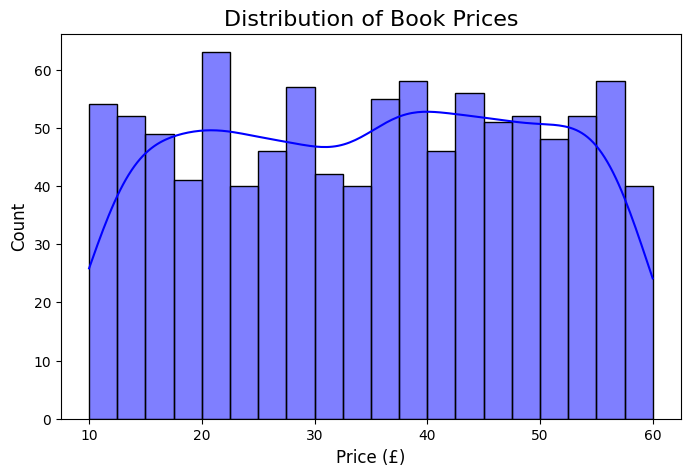

In [65]:
# Distribution of book prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Book Prices', fontsize=16)
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

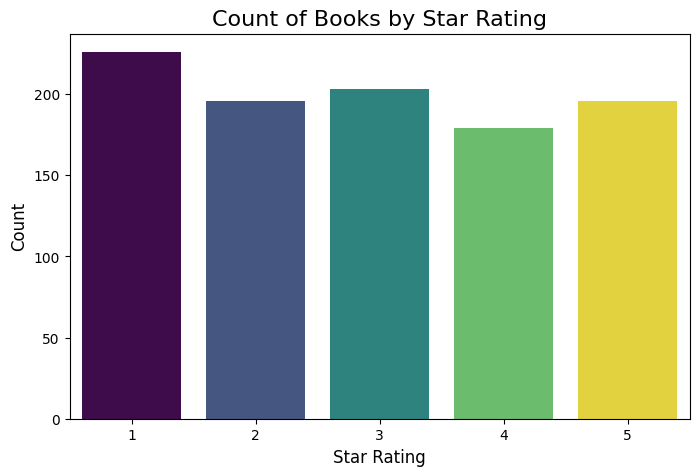

In [75]:
# Count of books by Star rating
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Star Rating', hue='Star Rating', palette='viridis', order=[1, 2, 3, 4, 5], dodge=False)
plt.legend([], [], frameon=False)  # Remove the legend
plt.title('Count of Books by Star Rating', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

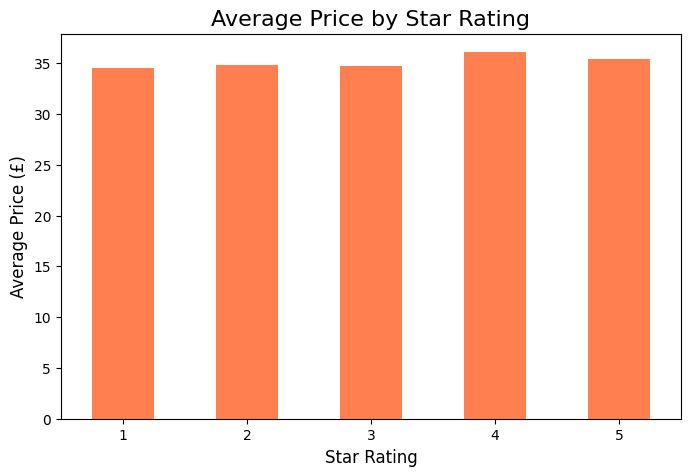

In [85]:
# Average price by star rating
avg_price_by_rating = df.groupby('Star Rating')['Price'].mean().sort_index()
plt.figure(figsize=(8, 5))
avg_price_by_rating.plot(kind='bar', color='coral')  # Use a valid color name like 'coral'
plt.title('Average Price by Star Rating', fontsize=16)
plt.xlabel('Star Rating', fontsize=12)
plt.ylabel('Average Price (£)', fontsize=12)
plt.xticks(rotation=0)
plt.show()


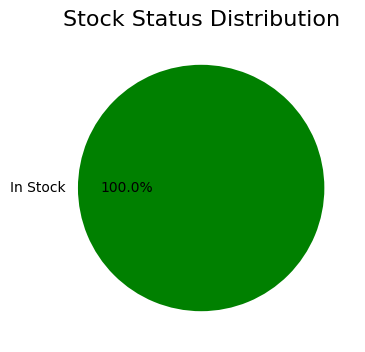

In [83]:
# Stock status analysis
stock_counts = df['Stock Status'].value_counts()
plt.figure(figsize=(6, 4))
stock_counts.plot(kind='pie', labels=['In Stock', 'Out of Stock'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Stock Status Distribution', fontsize=16)
plt.ylabel('')
plt.show()

In [105]:
# save as csv file
df.to_csv('books_details.csv', index=False, encoding='utf-8')